# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | payson
Processing Record 2 of Set 1 | lihue
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | tosagua
Processing Record 6 of Set 1 | vorgashor
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | boende
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | rio de janeiro
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | samus'
Processing Record 15 of Set 1 | port mathurin
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | niafunke
Processing Record 18 of Set 1 | paranhos
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | san julian
Processing Record 22 of Set 1 | taiohae
City not found.

Processing Record 36 of Set 4 | cockburn town
Processing Record 37 of Set 4 | muisne
Processing Record 38 of Set 4 | ushuaia
Processing Record 39 of Set 4 | chernyshevsk
Processing Record 40 of Set 4 | tambo
Processing Record 41 of Set 4 | maputo
Processing Record 42 of Set 4 | hakuba
City not found. Skipping...
Processing Record 43 of Set 4 | erenhot
Processing Record 44 of Set 4 | northam
Processing Record 45 of Set 4 | ponta delgada
Processing Record 46 of Set 4 | dudinka
Processing Record 47 of Set 4 | lata
Processing Record 48 of Set 4 | uturoa
Processing Record 49 of Set 4 | bechar
Processing Record 0 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 1 of Set 5 | ouellah
City not found. Skipping...
Processing Record 2 of Set 5 | okha
Processing Record 3 of Set 5 | el fuerte
Processing Record 4 of Set 5 | severo-yeniseyskiy
Processing Record 5 of Set 5 | tofol
Processing Record 6 of Set 5 | cabedelo
Processing Record 7 of Set 5 | tomok bolon
City not found. Skippi

Processing Record 22 of Set 8 | chibougamau
Processing Record 23 of Set 8 | zhoucun
Processing Record 24 of Set 8 | dalandzadgad
Processing Record 25 of Set 8 | ciudad valles
Processing Record 26 of Set 8 | horta
Processing Record 27 of Set 8 | puerto san carlos
City not found. Skipping...
Processing Record 28 of Set 8 | nueva gerona
Processing Record 29 of Set 8 | kupang
Processing Record 30 of Set 8 | krumovgrad
Processing Record 31 of Set 8 | ust-tsilma
Processing Record 32 of Set 8 | hotan
Processing Record 33 of Set 8 | poco verde
Processing Record 34 of Set 8 | gorno-altaysk
Processing Record 35 of Set 8 | alice springs
Processing Record 36 of Set 8 | rio brilhante
Processing Record 37 of Set 8 | port isabel
Processing Record 38 of Set 8 | el granada
Processing Record 39 of Set 8 | ust'-kulom
Processing Record 40 of Set 8 | dmitrovsk-orlovskiy
Processing Record 41 of Set 8 | sainte-marie
Processing Record 42 of Set 8 | tsiolkovskiy
City not found. Skipping...
Processing Record 43

Processing Record 14 of Set 12 | metlili chaamba
Processing Record 15 of Set 12 | lokomotivnyy
Processing Record 16 of Set 12 | kotma
Processing Record 17 of Set 12 | bulgan
Processing Record 18 of Set 12 | alexandria
Processing Record 19 of Set 12 | zhigalovo
Processing Record 20 of Set 12 | ribeira brava
Processing Record 21 of Set 12 | imbert
Processing Record 22 of Set 12 | holualoa
Processing Record 23 of Set 12 | greymouth
Processing Record 24 of Set 12 | nurota
Processing Record 25 of Set 12 | clearwater
Processing Record 26 of Set 12 | nabire
Processing Record 27 of Set 12 | anthony
Processing Record 28 of Set 12 | adrar
Processing Record 29 of Set 12 | bamyan
Processing Record 30 of Set 12 | abadan
Processing Record 31 of Set 12 | iowa falls
Processing Record 32 of Set 12 | tisul'
Processing Record 33 of Set 12 | balpyk bi
Processing Record 34 of Set 12 | aykol
City not found. Skipping...
Processing Record 35 of Set 12 | port-gentil
Processing Record 36 of Set 12 | myeik
Proce

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,payson,40.0444,-111.7321,285.60,47,0,1.24,US,1682775865
1,lihue,21.9789,-159.3672,295.92,94,40,5.14,US,1682775866
2,adamstown,-25.0660,-130.1015,297.47,78,100,4.45,PN,1682775866
3,waitangi,-43.9535,-176.5597,285.27,92,100,4.06,NZ,1682775866
4,tosagua,-0.7833,-80.2500,297.54,93,100,1.55,EC,1682775867


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,payson,40.0444,-111.7321,285.60,47,0,1.24,US,1682775865
1,lihue,21.9789,-159.3672,295.92,94,40,5.14,US,1682775866
2,adamstown,-25.0660,-130.1015,297.47,78,100,4.45,PN,1682775866
3,waitangi,-43.9535,-176.5597,285.27,92,100,4.06,NZ,1682775866
4,tosagua,-0.7833,-80.2500,297.54,93,100,1.55,EC,1682775867


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

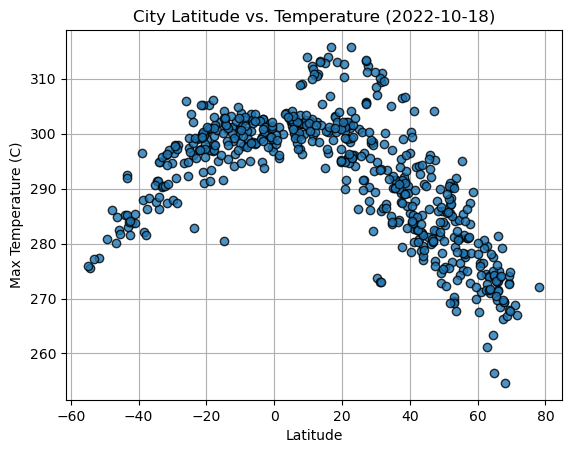

In [45]:
# Build scatter plot for latitude vs. temperature

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolor = 'black', alpha = 0.8, zorder=3)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Temperature (2022-10-18)')
plt.grid(zorder=0)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

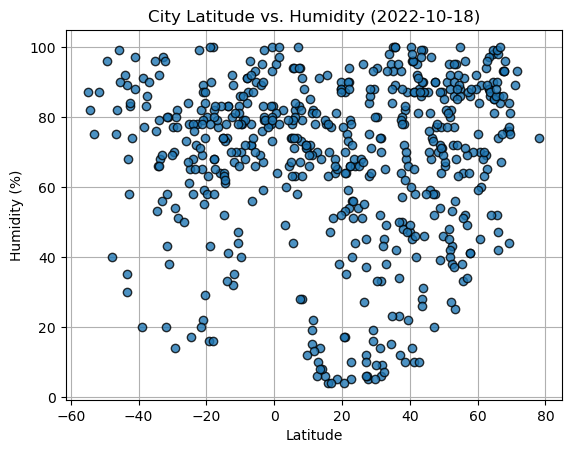

In [46]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolor = 'black', alpha= 0.8, zorder = 3)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid(zorder=0)
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

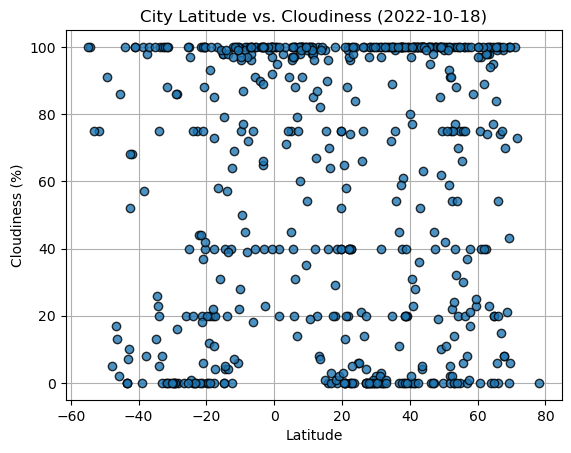

In [47]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolor = 'black', alpha= 0.8, zorder = 3)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid(zorder=0)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

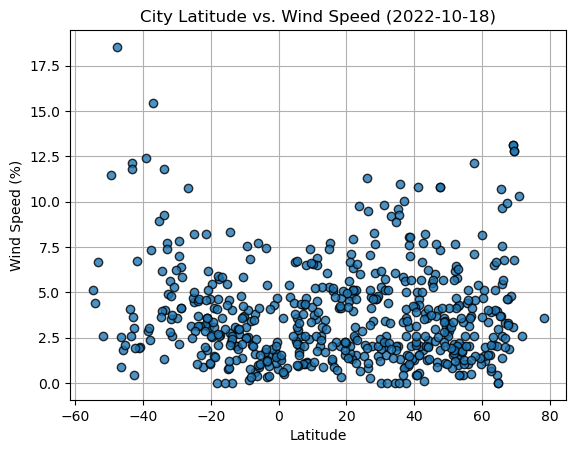

In [48]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolor = 'black', alpha= 0.8, zorder = 3)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid(zorder=0)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values, edgecolor = 'black', alpha= 0.8, zorder = 3)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()), xytext=(x_values.median(), y_values.min()),
                 color="red")
    plt.grid(zorder=0)
    print("The r-squared is: "+str(rvalue))
    plt.show

In [81]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,payson,40.0444,-111.7321,285.60,47,0,1.24,US,1682775865
1,lihue,21.9789,-159.3672,295.92,94,40,5.14,US,1682775866
5,vorgashor,67.5833,63.9500,266.21,93,99,4.63,RU,1682775361
12,whitehorse,60.7161,-135.0538,276.38,70,75,5.14,CA,1682775725
13,samus',56.7475,84.6992,280.93,49,37,3.70,RU,1682775872


In [82]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,297.47,78,100,4.45,PN,1682775866
3,waitangi,-43.9535,-176.5597,285.27,92,100,4.06,NZ,1682775866
4,tosagua,-0.7833,-80.2500,297.54,93,100,1.55,EC,1682775867
6,port-aux-francais,-49.3500,70.2167,280.75,96,91,11.48,TF,1682775868
7,invercargill,-46.4000,168.3500,284.83,82,13,0.89,NZ,1682775805


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8268550264143422


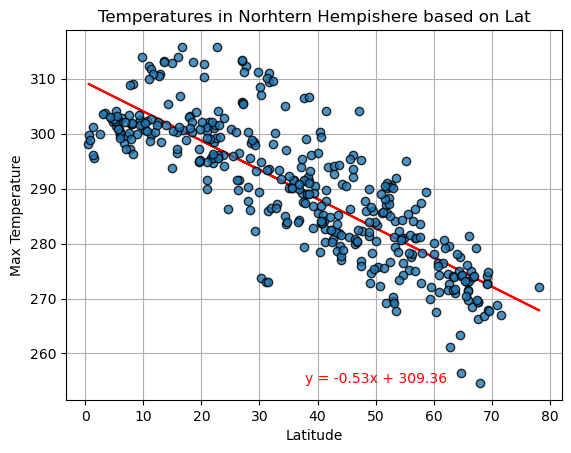

In [84]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.title('Temperatures in Norhtern Hempishere based on Lat')
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
linear_regression(x_values, y_values)

The r-squared is: 0.7708220359439933


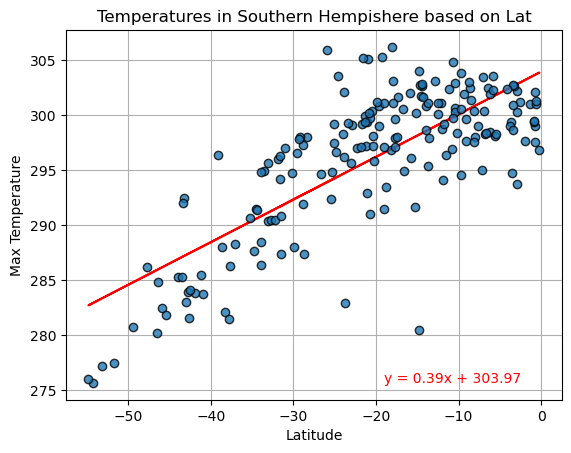

In [92]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.title('Temperatures in Southern Hempishere based on Lat')
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** 

In the Northern Hemisphere, maximum temperatures record higher when the latitude is closer to zero. 

In the Southern Hemisphere, the same can be analyzed: at its lower latitudes (<-50), the maximum temperature is lowest (<280). The closer latitude gets to 0, the higher the maximum temperature becomes. 

From this, we can assess that temperatures globally are highest when latitudes approach 0 degrees.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1895847169752545


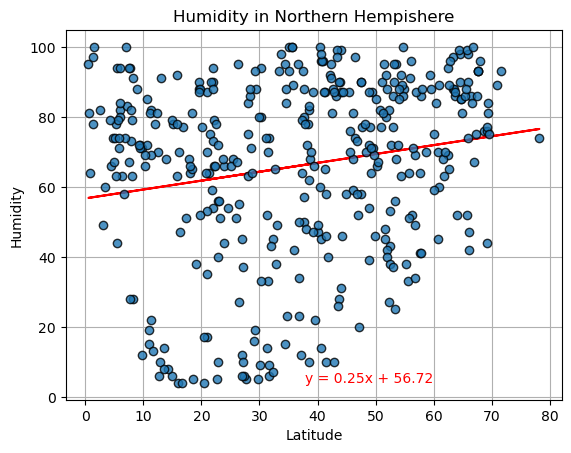

In [93]:
# Northern Hemisphere
plt.title('Humidity in Northern Hempishere')
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.ylabel('Humidity')
plt.xlabel('Latitude')
linear_regression(x_values, y_values)

The r-squared is: 0.07291336259566747


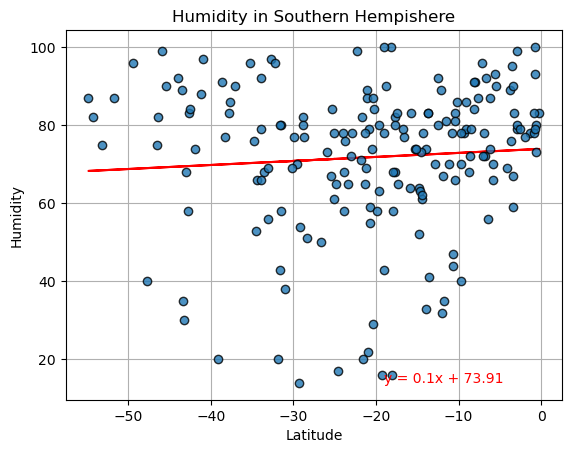

In [94]:
# Southern Hemisphere
plt.title('Humidity in Southern Hempishere')
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.ylabel('Humidity')
plt.xlabel('Latitude')
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** 

After graphing both regressions, neither Northern nor Southern Hemispheres demonstrate a correlation between humidity and latitude. In addition to the graphs remaining consistent, the r-values (0.07291336259566747 for Southern and 0.1895847169752545 for Northern) are close to 0, which indicates no significant relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.04390218600837741


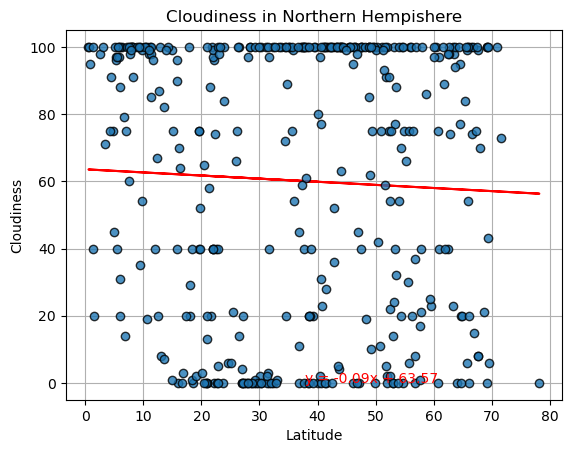

In [101]:
# Northern Hemisphere
plt.title('Cloudiness in Northern Hempishere')
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
linear_regression(x_values, y_values)

The r-squared is: 0.27672940823609254


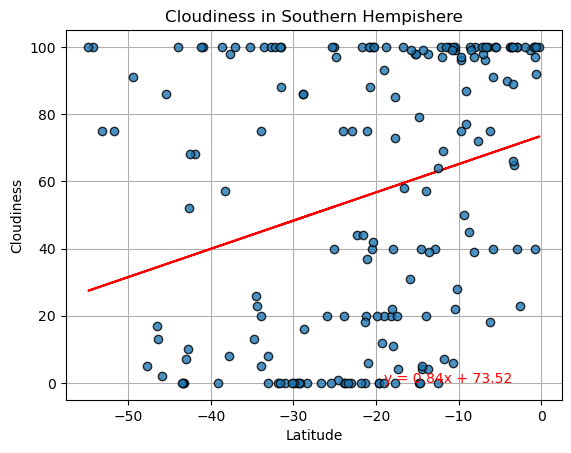

In [100]:
# Southern Hemisphere
plt.title('Cloudiness in Southern Hempishere')
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** 

Similar to humidity, there is no statistically significant relationship between cloudiness and latitiude in the Northern Hemisphere (-0.04390218600837741). 

In the Southern Hemisphere, the r-value of 0.27672940823609254 is also statistically insignificant. It is important to note, cloudiness, that a stronger pattern of humidity rising with latitude exists in this hemisphere than in the former.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.10042956293872633


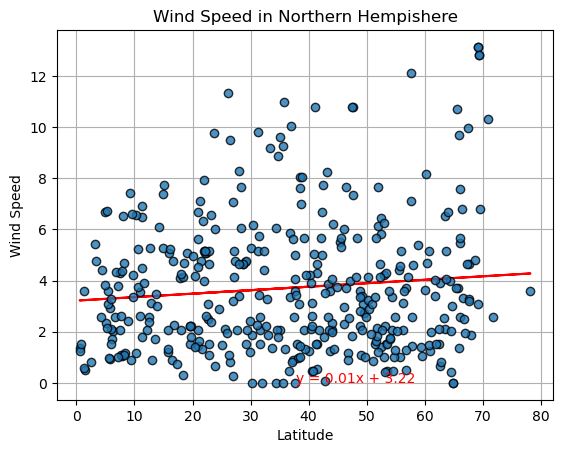

In [99]:
# Northern Hemisphere
plt.title('Wind Speed in Northern Hempishere')
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
linear_regression(x_values, y_values)

The r-squared is: -0.40689426055647404


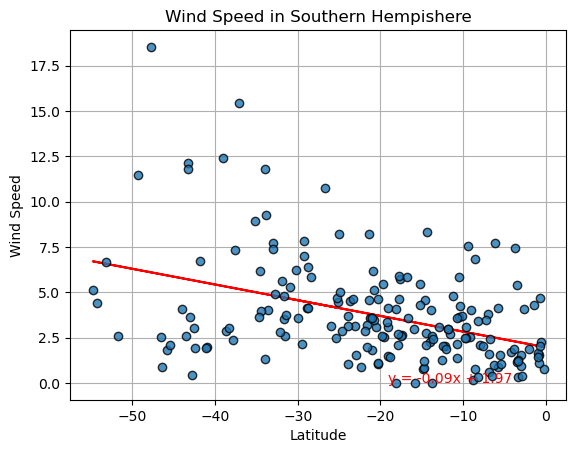

In [98]:
# Southern Hemisphere
plt.title('Wind Speed in Southern Hempishere')
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** 

The r-value for the Southern Hemisphere being -0.40689426055647404 indicates that the negative linear relationship observed is moderate - as latidude increases, there is a trend that wind speed will decrease.

The r-value for the Northern Hemisphere is 0.10042956293872633. Because the number is so close to 0, although there is a visible trend of latitude and wind speed increasing together, it is a statistically weak correlation.